# GSEA analysis on leukemia dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gsea import *
import numpy as np
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

## Load data

In [4]:
genes, D, C = read_expression_file("data/leukemia.txt")
gene_sets, gene_set_names = read_genesets_file("data/pathways.txt", genes)
gene_set_hash = {}
for i in range(len(gene_sets)):
    gene_set_hash[gene_set_names[i][0]] = {'indexes':gene_sets[i],'desc':gene_set_names[i][1]}

In [5]:
# verify that the dimensions make sense
len(genes),D.shape,len(C)

(2672, (2672, 72), 72)

## Enrichment score calculations
We graphically present the calculation of ES.

In [173]:
L,r = rank_genes(D,C)

See if the first genes in *L* are indeed correlated with *C*

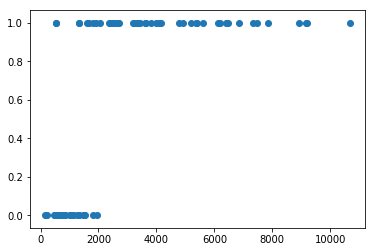

In [174]:
scatter(D[L[1],:],C)

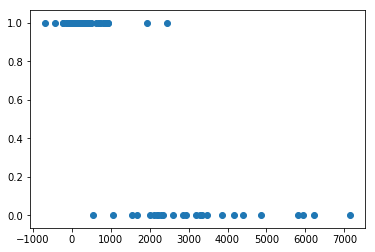

In [175]:
scatter(D[L[-1],:],C)

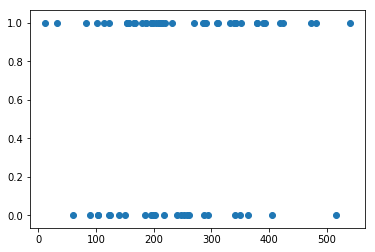

In [176]:
scatter(D[L[1000],:],C)

## Graphical ilustration of ES calculations

In [16]:
p_exp = 1
def plot_es_calculations(name, L, r):
    S = gene_set_hash[name]['indexes']
    N = len(L)
    S_mask = np.zeros(N)
    S_mask[S] = 1
    # reorder gene set mask
    S_mask = S_mask[L]
    N_R = sum(abs(r*S_mask)**p_exp)
    P_hit = np.cumsum(abs(r*S_mask)**p_exp)/N_R if N_R!=0 else np.zeros_like(S_mask)
    N_H = len(S)
    P_mis = np.cumsum((1-S_mask))/(N-N_H) if N!=N_H else np.zeros_like(S_mask)
    idx = np.argmax(abs(P_hit - P_mis))
    print("ES =", P_hit[idx]-P_mis[idx])
    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].plot(S_mask)
    axarr[0].set_title('gene set %s' % name)
    axarr[1].plot(r)
    axarr[1].set_title('correlation with phenotype')
    axarr[2].plot(P_hit-P_mis)
    axarr[2].set_title('random walk')

ES = 0.214604376897


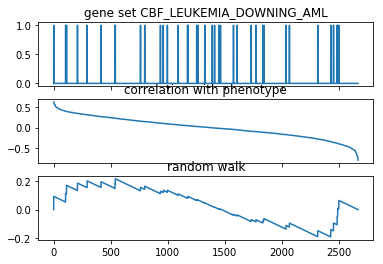

In [114]:
L,r = rank_genes(D,C)
plot_es_calculations('CBF_LEUKEMIA_DOWNING_AML', L, r)

## Random phenotype labels
Now let's assign phenotype labels randomly. Is the ES much different?

[0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0]
ES = -0.446675459428


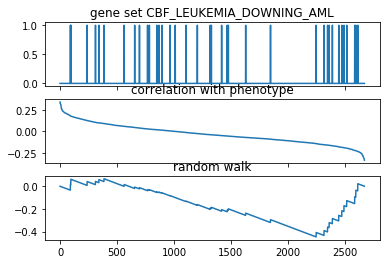

In [19]:
N, k = D.shape
pi = np.array([np.random.randint(0,2) for i in range(k)])
L, r = rank_genes(D,pi)
print(pi)
plot_es_calculations('CBF_LEUKEMIA_DOWNING_AML', L, r)

## GSEA analysis

In [6]:
%time order, NES, p_values = gsea(D, C, gene_sets)

CPU times: user 8min 55s, sys: 71.8 ms, total: 8min 55s
Wall time: 8min 55s


In [14]:
from IPython.display import display, Markdown
s = "| geneset | NES | tp-value | tnumber of genes in geneset |\n |-------|---|---|---|\n "
for i in range(len(order)):
    s = s + "| **%s** | %.3f | %.7f | %d |\n" % (gene_set_names[order[i]][0], NES[i], p_values[i], len(gene_sets[order[i]]))
display(Markdown(s))

| geneset | NES | tp-value | tnumber of genes in geneset |
 |-------|---|---|---|
 | **MAP00532_Chondroitin_Heparan_sulfate_biosynthesis** | -2.542 | 0.0000000 | 0 |
| **mitrPathway** | 2.257 | 0.0454545 | 3 |
| **pentosePathway** | -2.092 | 0.0268456 | 3 |
| **pepiPathway** | -2.052 | 0.0047170 | 5 |
| **mspPathway** | -2.049 | 0.0390625 | 4 |
| **aifPathway** | 2.030 | 0.0220386 | 2 |
| **slrp2Pathway** | -2.013 | 0.0135593 | 3 |
| **MAP_kinase_kinase_activity** | -2.011 | 0.0116279 | 4 |
| **ROS** | -2.009 | 0.0239726 | 6 |
| **Pentose_Phosphate_Pathway** | -1.996 | 0.0168776 | 5 |
| **plk3Pathway** | 1.983 | 0.0532544 | 5 |
| **anthraxPathway** | -1.975 | 0.0145985 | 2 |
| **MAP00193_ATP_synthesis** | -1.969 | 0.0154242 | 10 |
| **ifngPathway** | -1.952 | 0.0258621 | 5 |
| **neutrophilPathway** | -1.902 | 0.0089888 | 8 |
| **tcrMoleculePathway** | 1.881 | 0.0572687 | 5 |
| **cell_cycle_checkpointII** | 1.877 | 0.0800000 | 7 |
| **MAP00195_Photosynthesis** | -1.868 | 0.0094563 | 10 |
| **cdc25Pathway** | 1.865 | 0.0446927 | 7 |
| **eif2Pathway** | 1.854 | 0.0386100 | 6 |
| **MAP00533_Keratan_sulfate_biosynthesis** | 1.847 | 0.0397727 | 2 |
| **MAP00531_Glycosaminoglycan_degradation** | -1.847 | 0.0363636 | 9 |
| **MAP03070_Type_III_secretion_system** | -1.809 | 0.0491803 | 10 |
| **il10Pathway** | -1.807 | 0.0540541 | 13 |
| **tertPathway** | 1.799 | 0.0628272 | 8 |
| **ST_Dictyostelium_discoideum_cAMP_Receptor_G_Protein_Independent_Pathways** | 1.797 | 0.0909091 | 3 |
| **ST_Interleukin_13_Pathway** | -1.795 | 0.0794702 | 4 |
| **MAP00680_Methane_metabolism** | -1.790 | 0.0547445 | 6 |
| **rarPathway** | -1.788 | 0.0284091 | 3 |
| **etcPathway** | 1.784 | 0.0454545 | 6 |
| **reckPathway** | -1.778 | 0.0203562 | 6 |
| **freePathway** | -1.771 | 0.0699588 | 7 |
| **fosbPathway** | -1.768 | 0.0239234 | 4 |
| **ldlPathway** | -1.766 | 0.0625000 | 6 |
| **rbPathway** | 1.763 | 0.0476190 | 11 |
| **vitcbPathway** | -1.758 | 0.0608108 | 5 |
| **MAP00480_Glutathione_metabolism** | -1.752 | 0.0349206 | 13 |
| **MAP00600_Sphingoglycolipid_metabolism** | -1.750 | 0.0708661 | 9 |
| **SA_MMP_CYTOKINE_CONNECTION** | -1.741 | 0.1000000 | 11 |
| **fbw7Pathway** | 1.715 | 0.0900901 | 8 |
| **p27Pathway** | 1.711 | 0.0710900 | 10 |
| **alternativePathway** | -1.711 | 0.0325581 | 8 |
| **gabaPathway** | -1.709 | 0.0414013 | 4 |
| **ST_IL_13_PATHWAY** | -1.708 | 0.0326975 | 4 |
| **ahspPathway** | -1.704 | 0.0714286 | 9 |
| **tnfr2Pathway** | -1.704 | 0.0825688 | 10 |
| **cell2cellPathway** | -1.699 | 0.0307329 | 8 |
| **il18Pathway** | -1.698 | 0.0662252 | 6 |
| **mrpPathway** | -1.690 | 0.0566038 | 3 |
| **g1pPathway** | 1.673 | 0.1029412 | 2 |
| **tsp1Pathway** | -1.673 | 0.0373134 | 7 |
| **MAP00970_Aminoacyl_tRNA_biosynthesis** | 1.665 | 0.0937500 | 16 |
| **krebPathway** | 1.657 | 0.0389610 | 6 |
| **tercPathway** | 1.656 | 0.0704846 | 6 |
| **atrbrcaPathway** | 1.634 | 0.1105528 | 8 |
| **mRNA_splicing** | 1.626 | 0.0544959 | 28 |
| **MAP00530_Aminosugars_metabolism** | -1.626 | 0.0430769 | 10 |
| **GPCRs_Class_A_Rhodopsin-like_2** | -1.620 | 0.0792079 | 1 |
| **MAP00910_Nitrogen_metabolism** | -1.620 | 0.1018519 | 11 |
| **Fatty_Acid_Synthesis** | 1.619 | 0.1161290 | 7 |
| **parkinsonsPathway** | -1.610 | 0.0600601 | 1 |
| **il1rPathway** | -1.606 | 0.0955882 | 20 |
| **eosinophilsPathway** | -1.606 | 0.0356295 | 6 |
| **ranPathway** | 1.599 | 0.0651341 | 2 |
| **eponfkbPathway** | -1.597 | 0.0972973 | 8 |
| **dbpbPathway** | -1.589 | 0.0779944 | 2 |
| **stemPathway** | -1.581 | 0.0510441 | 10 |
| **dnafragmentPathway** | 1.581 | 0.1105769 | 8 |
| **eea1Pathway** | -1.572 | 0.0425056 | 4 |
| **botulinPathway** | 1.571 | 0.1028037 | 4 |
| **pgc1aPathway** | 1.569 | 0.0841121 | 13 |
| **MAP00603_Globoside_metabolism** | -1.566 | 0.0803859 | 9 |
| **il22bpPathway** | -1.560 | 0.0971223 | 7 |
| **lymphocytePathway** | -1.559 | 0.0900621 | 9 |
| **telPathway** | 1.556 | 0.1151832 | 12 |
| **monocytePathway** | -1.553 | 0.1186441 | 11 |
| **feederPathway** | -1.551 | 0.0909091 | 4 |
| **tcraPathway** | 1.540 | 0.0813559 | 12 |
| **MAP00860_Porphyrin_and_chlorophyll_metabolism** | -1.536 | 0.0740741 | 12 |
| **Proteasome_Degradation** | 1.535 | 0.0865672 | 28 |
| **akap13Pathway** | -1.531 | 0.1428571 | 5 |
| **classicPathway** | -1.531 | 0.1207547 | 9 |
| **ace2Pathway** | -1.531 | 0.1250000 | 4 |
| **MAP00450_Selenoamino_acid_metabolism** | -1.524 | 0.0883191 | 4 |
| **ST_Interferon_gamma_Pathway** | -1.518 | 0.1379310 | 5 |
| **ST_Ga13_Pathway** | -1.517 | 0.0822785 | 22 |
| **ANTI_CD44_UP** | -1.509 | 0.1087533 | 23 |
| **S1P_Signaling** | -1.506 | 0.1114865 | 12 |
| **MAP00630_Glyoxylate_and_dicarboxylate_metabolism** | 1.503 | 0.0653951 | 5 |
| **ST_STAT3_Pathway** | -1.501 | 0.0948012 | 5 |
| **neurotransmittersPathway** | -1.495 | 0.1277533 | 6 |
| **tollPathway** | -1.484 | 0.1237458 | 15 |
| **bbcellPathway** | 1.478 | 0.1047297 | 3 |
| **ST_Gaq_Pathway** | -1.478 | 0.1571429 | 18 |
| **SA_BONE_MORPHOGENETIC** | -1.473 | 0.1260054 | 1 |
| **SA_REG_CASCADE_OF_CYCLIN_EXPR** | 1.472 | 0.1734104 | 7 |
| **ranklPathway** | -1.469 | 0.0891566 | 10 |
| **p53Pathway** | 1.469 | 0.1571429 | 13 |
| **compPathway** | -1.467 | 0.1400966 | 13 |
| **cptPathway** | 1.465 | 0.1066667 | 2 |
| **g2Pathway** | 1.464 | 0.1696429 | 19 |
| **cell_cycle_checkpoint** | 1.461 | 0.1467890 | 17 |
| **TCA** | 1.460 | 0.1216730 | 10 |
| **blymphocytePathway** | -1.455 | 0.1612903 | 9 |
| **th1th2Pathway** | -1.453 | 0.1250000 | 13 |
| **vifPathway** | 1.452 | 0.1300000 | 3 |
| **MAP00602_Blood_group_glycolipid_biosynthesis_neolact_series** | -1.451 | 0.1005587 | 7 |
| **cd40Pathway** | -1.449 | 0.1186441 | 7 |
| **setPathway** | 1.448 | 0.1369295 | 10 |
| **extrinsicPathway** | -1.441 | 0.1155779 | 11 |
| **lechtinPathway** | -1.440 | 0.1212121 | 8 |
| **lairPathway** | -1.439 | 0.1000000 | 15 |
| **mRNA_processing** | 1.433 | 0.1352201 | 27 |
| **mta3Pathway** | -1.430 | 0.1674877 | 7 |
| **NFKB_REDUCED** | -1.417 | 0.0925110 | 12 |
| **Matrix_Metalloproteinases** | -1.417 | 0.1550388 | 16 |
| **egfr_smrtePathway** | -1.416 | 0.1531532 | 7 |
| **betaoxidationPathway** | 1.416 | 0.1267606 | 5 |
| **relaPathway** | -1.414 | 0.1337580 | 12 |
| **ifnaPathway** | -1.409 | 0.1631579 | 8 |
| **41bbPathway** | -1.408 | 0.0822785 | 12 |
| **acetaminophenPathway** | -1.404 | 0.1890547 | 5 |
| **il6Pathway** | -1.404 | 0.1131222 | 16 |
| **GLYCOL** | -1.401 | 0.1451613 | 12 |
| **parkinPathway** | 1.401 | 0.1247059 | 3 |
| **circadianPathway** | 1.398 | 0.1346154 | 4 |
| **cell_death** | -1.395 | 0.1878173 | 12 |
| **stat3Pathway** | -1.393 | 0.1595745 | 6 |
| **ketonebodiesPathway** | 1.389 | 0.1301205 | 3 |
| **HOXA9_DOWN** | -1.386 | 0.1691729 | 26 |
| **DNA_DAMAGE_SIGNALLING** | 1.385 | 0.1809211 | 60 |
| **KET** | 1.385 | 0.1642229 | 3 |
| **il5Pathway** | -1.383 | 0.1563275 | 9 |
| **arfPathway** | 1.380 | 0.1262626 | 12 |
| **slrpPathway** | -1.377 | 0.1290323 | 3 |
| **erythPathway** | -1.367 | 0.1528662 | 10 |
| **Eicosanoid_Synthesis** | -1.361 | 0.1600000 | 11 |
| **tRNA_Synthetases** | 1.359 | 0.2118227 | 17 |
| **CR_REPAIR** | 1.354 | 0.1666667 | 25 |
| **GATA1_WEISS** | -1.353 | 0.2000000 | 13 |
| **Complement_Activation_Classical** | -1.351 | 0.2010870 | 10 |
| **stressPathway** | -1.349 | 0.1572327 | 16 |
| **integrinPathway** | -1.345 | 0.1888112 | 24 |
| **pkcPathway** | -1.338 | 0.1787879 | 6 |
| **proteasomePathway** | 1.337 | 0.2049689 | 19 |
| **mitochondriaPathway** | 1.331 | 0.1926606 | 13 |
| **cytokinePathway** | -1.330 | 0.1736111 | 14 |
| **il7Pathway** | 1.327 | 0.2127660 | 15 |
| **MAP00512_O_Glycans_biosynthesis** | -1.324 | 0.1648746 | 3 |
| **GO_ROS** | -1.317 | 0.1595442 | 19 |
| **DOWNREG_BY_HOXA9** | -1.315 | 0.2114286 | 23 |
| **MAP00720_Reductive_carboxylate_cycle_CO2_fixation** | 1.311 | 0.1576087 | 6 |
| **skp2e2fPathway** | 1.308 | 0.1901840 | 10 |
| **ST_Type_I_Interferon_Pathway** | -1.307 | 0.1862245 | 8 |
| **MAP00601_Blood_group_glycolipid_biosynthesis_lact_series** | -1.304 | 0.1739130 | 5 |
| **longevityPathway** | -1.304 | 0.1913265 | 10 |
| **Cell_Cycle** | 1.302 | 0.2032086 | 50 |
| **fibrinolysisPathway** | -1.300 | 0.2382812 | 9 |
| **tall1Pathway** | -1.300 | 0.1798561 | 8 |
| **MAP00340_Histidine_metabolism** | -1.292 | 0.2263514 | 12 |
| **glycolysisPathway** | -1.290 | 0.2198582 | 6 |
| **tcapoptosisPathway** | 1.289 | 0.1919192 | 7 |
| **CR_TRANSPORT_OF_VESICLES** | -1.286 | 0.2035928 | 17 |
| **MAP00590_Prostaglandin_and_leukotriene_metabolism** | -1.282 | 0.2066116 | 10 |
| **flumazenilPathway** | -1.282 | 0.1694915 | 5 |
| **dcPathway** | -1.277 | 0.2131148 | 13 |
| **notchPathway** | -1.276 | 0.2080537 | 4 |
| **erbb3Pathway** | -1.274 | 0.2182320 | 1 |
| **KRAS_TOP100_KNOCKDOWN** | -1.272 | 0.2118644 | 34 |
| **pparPathway** | -1.271 | 0.1578947 | 2 |
| **bcl2family_and_reg_network** | -1.269 | 0.2013889 | 15 |
| **plcePathway** | -1.268 | 0.2014134 | 7 |
| **radiation_sensitivity** | 1.264 | 0.2456140 | 18 |
| **ANTI_CD44_DOWN** | -1.259 | 0.2438017 | 12 |
| **rabPathway** | -1.258 | 0.1965517 | 10 |
| **appPathway** | 1.258 | 0.2523810 | 3 |
| **ST_Tumor_Necrosis_Factor_Pathway** | -1.256 | 0.2179487 | 22 |
| **HOX_LIST_JP** | -1.256 | 0.2168675 | 18 |
| **XINACT_MERGED** | 1.252 | 0.2371134 | 12 |
| **ptc1Pathway** | 1.250 | 0.2258065 | 9 |
| **CR_HORMONAL_FUNCTIONS** | -1.241 | 0.2439678 | 6 |
| **intrinsicPathway** | -1.236 | 0.2534247 | 13 |
| **MAP00240_Pyrimidine_metabolism** | 1.235 | 0.2328767 | 31 |
| **CR_CELL_CYCLE** | 1.231 | 0.2316716 | 56 |
| **mRNA_binding_activity** | 1.228 | 0.2482517 | 8 |
| **SA_G2_AND_M_PHASES** | 1.224 | 0.2478134 | 6 |
| **MAP00430_Taurine_and_hypotaurine_metabolism** | -1.218 | 0.2476190 | 3 |
| **tnf_and_fas_network** | -1.214 | 0.2479564 | 16 |
| **MAP00230_Purine_metabolism** | 1.212 | 0.2413793 | 55 |
| **mcalpainPathway** | -1.209 | 0.2714286 | 19 |
| **ox40Pathway** | 1.197 | 0.2460317 | 3 |
| **ngfPathway** | -1.196 | 0.2514620 | 15 |
| **srcRPTPPathway** | 1.195 | 0.2488479 | 10 |
| **SA_CASPASE_CASCADE** | 1.194 | 0.2642857 | 13 |
| **nthiPathway** | -1.190 | 0.2500000 | 14 |
| **leptinPathway** | -1.188 | 0.2662722 | 5 |
| **MAP00620_Pyruvate_metabolism** | 1.187 | 0.2727273 | 23 |
| **ephA4Pathway** | -1.185 | 0.2471910 | 9 |
| **MAP00670_One_carbon_pool_by_folate** | 1.184 | 0.2977667 | 10 |
| **MAP00360_Phenylalanine_metabolism** | -1.181 | 0.2759740 | 9 |
| **ST_PAC1_RECEPTOR_PATHWAY** | -1.172 | 0.2777778 | 6 |
| **il3Pathway** | -1.171 | 0.2861357 | 11 |
| **malatexPathway** | 1.168 | 0.2971888 | 6 |
| **AR_ORTHOS_MAPPED_TO_U133_VIA_NETAFFX** | 1.166 | 0.2539683 | 26 |
| **carm1Pathway** | -1.163 | 0.2605364 | 10 |
| **Krebs-TCA_Cycle** | 1.163 | 0.2827586 | 21 |
| **cell_adhesion_receptor_activity** | -1.161 | 0.2968750 | 21 |
| **cdk5Pathway** | -1.161 | 0.2857143 | 9 |
| **MAP00460_Cyanoamino_acid_metabolism** | -1.160 | 0.2641509 | 2 |
| **vobesityPathway** | 1.157 | 0.2909836 | 6 |
| **MAP00062_Fatty_acid_biosynthesis_path_2** | 1.157 | 0.3333333 | 7 |
| **carm-erPathway** | 1.154 | 0.2968750 | 15 |
| **MAP00380_Tryptophan_metabolism** | -1.154 | 0.2926829 | 30 |
| **tumor_supressor** | 1.152 | 0.3262599 | 18 |
| **fatty_acid_metabolism** | -1.149 | 0.2897727 | 10 |
| **ST_G_alpha_i_Pathway_** | -1.148 | 0.2887324 | 20 |
| **CR_ANGIOG** | -1.145 | 0.2790698 | 5 |
| **inflamPathway** | -1.144 | 0.2879581 | 22 |
| **ucalpainPathway** | -1.141 | 0.2500000 | 11 |
| **salmonellaPathway** | -1.140 | 0.2997199 | 7 |
| **MAP00030_Pentose_phosphate_pathway** | -1.139 | 0.3493151 | 13 |
| **MAPKKK_cascade** | -1.137 | 0.2924528 | 7 |
| **MYC_MUT** | -1.134 | 0.2954545 | 2 |
| **epoPathway** | -1.131 | 0.3406593 | 16 |
| **SA_DAG1** | -1.129 | 0.3266332 | 8 |
| **ST_MONOCYTE_AD_PATHWAY** | -1.123 | 0.2885375 | 17 |
| **MAP00632_Benzoate_degradation** | 1.122 | 0.2916667 | 7 |
| **CR_CYTOSKELETON** | -1.122 | 0.2953216 | 19 |
| **cellcyclePathway** | 1.121 | 0.2789474 | 19 |
| **cell_adhesion_molecule_activity** | -1.121 | 0.2923077 | 64 |
| **tidPathway** | -1.121 | 0.3042453 | 13 |
| **pelp1Pathway** | 1.120 | 0.2633929 | 4 |
| **SIG_CD40PATHWAYMAP** | -1.119 | 0.3125000 | 19 |
| **MAP00500_Starch_and_sucrose_metabolism** | -1.118 | 0.3379888 | 15 |
| **MAP00252_Alanine_and_aspartate_metabolism** | 1.111 | 0.3227848 | 17 |
| **Glycogen_Metabolism** | 1.109 | 0.3018868 | 25 |
| **gsPathway** | 1.109 | 0.3636364 | 5 |
| **AR_MOUSE** | 1.102 | 0.3412073 | 26 |
| **MAP03020_RNA_polymerase** | 1.101 | 0.3569794 | 10 |
| **GPCRs_Class_B_Secretin-like** | -1.101 | 0.3214286 | 11 |
| **ST_Ga12_Pathway** | -1.100 | 0.3866667 | 15 |
| **d4gdiPathway** | 1.100 | 0.3672131 | 11 |
| **EMT_DOWN** | -1.099 | 0.3567073 | 29 |
| **MAP00310_Lysine_degradation** | -1.095 | 0.3629243 | 11 |
| **fasPathway** | 1.093 | 0.3281250 | 21 |
| **MAP00020_Citrate_cycle_TCA_cycle** | 1.090 | 0.3472222 | 15 |
| **spryPathway** | -1.087 | 0.3679245 | 9 |
| **BRCA_DOWN** | 1.086 | 0.3777090 | 8 |
| **soddPathway** | -1.084 | 0.3399015 | 8 |
| **hcmvPathway** | -1.082 | 0.3372434 | 14 |
| **ST_G_alpha_5_Pathway** | -1.082 | 0.3824451 | 8 |
| **p35alzheimersPathway** | -1.080 | 0.3269962 | 9 |
| **gata3Pathway** | -1.079 | 0.3802395 | 12 |
| **MYC_WT** | -1.078 | 0.3712575 | 2 |
| **ST_Jak_STAT_Pathway** | -1.072 | 0.3333333 | 4 |
| **MAP00650_Butanoate_metabolism** | -1.070 | 0.3520000 | 16 |
| **cell_adhesion** | -1.069 | 0.3619048 | 103 |
| **SA_TRKA_RECEPTOR** | -1.068 | 0.3701657 | 12 |
| **plcdPathway** | -1.066 | 0.3603604 | 3 |
| **asbcellPathway** | -1.063 | 0.3641026 | 6 |
| **pyk2Pathway** | -1.061 | 0.3121387 | 23 |
| **nfkbPathway** | -1.057 | 0.3777778 | 16 |
| **TESTIS_GENES_FROM_XHX_AND_NETAFFX** | -1.057 | 0.3320611 | 20 |
| **keratinocytePathway** | -1.055 | 0.3214286 | 30 |
| **cblPathway** | -1.054 | 0.4026846 | 6 |
| **tubbyPathway** | -1.053 | 0.4019139 | 6 |
| **hdacPathway** | 1.053 | 0.3815789 | 19 |
| **g1Pathway** | 1.052 | 0.4010417 | 23 |
| **ST_ERK1_ERK2_MAPK_Pathway** | -1.049 | 0.3842795 | 23 |
| **igf1mtorPathway** | 1.044 | 0.4065934 | 17 |
| **wntPathway** | 1.041 | 0.4000000 | 13 |
| **MAP00740_Riboflavin_metabolism** | 1.039 | 0.3841463 | 3 |
| **ADULT_LIVER_vs_FETAL_LIVER_GNF2** | -1.038 | 0.3636364 | 34 |
| **ptenPathway** | -1.037 | 0.3689840 | 11 |
| **MAPK_Cascade** | -1.028 | 0.4023904 | 13 |
| **nktPathway** | -1.027 | 0.4101877 | 23 |
| **cremPathway** | 1.026 | 0.4427861 | 5 |
| **malatePathway** | 1.025 | 0.4138817 | 4 |
| **cdc42racPathway** | -1.025 | 0.4014599 | 9 |
| **cell_motility** | -1.019 | 0.4115044 | 63 |
| **INSULIN_2F_DOWN** | -1.016 | 0.3958333 | 7 |
| **Electron_Transport_Chain** | 1.015 | 0.3716216 | 38 |
| **HTERT_DOWN** | -1.015 | 0.4421053 | 59 |
| **Wnt_Signaling** | 1.001 | 0.4347826 | 29 |
| **GLUCO** | -0.998 | 0.3741497 | 19 |
| **trkaPathway** | -0.997 | 0.4510638 | 9 |
| **cell_cycle_regulator** | 0.995 | 0.4139535 | 17 |
| **rnaPathway** | 0.994 | 0.4437500 | 6 |
| **VOXPHOS** | 0.994 | 0.4407407 | 38 |
| **FA** | 0.992 | 0.3991031 | 17 |
| **MAP00350_Tyrosine_metabolism** | -0.990 | 0.3928571 | 17 |
| **ST_Interleukin_4_Pathway** | -0.990 | 0.5061125 | 14 |
| **tob1Pathway** | 0.990 | 0.3732394 | 14 |
| **GLUT_DOWN** | 0.990 | 0.4430769 | 184 |
| **MAP00100_Sterol_biosynthesis** | 0.989 | 0.4750000 | 9 |
| **gsk3Pathway** | -0.986 | 0.3809524 | 16 |
| **TGF_Beta_Signaling_Pathway** | -0.984 | 0.4451411 | 26 |
| **MAP00400_Phenylalanine_tyrosine_and_tryptophan_biosynthesis** | -0.978 | 0.4971910 | 6 |
| **cskPathway** | 0.977 | 0.4019934 | 21 |
| **erbb4Pathway** | 0.971 | 0.4919355 | 4 |
| **tnfr1Pathway** | 0.970 | 0.4863636 | 23 |
| **SA_PROGRAMMED_CELL_DEATH** | 0.962 | 0.5000000 | 6 |
| **CR_CAM** | -0.962 | 0.4818482 | 71 |
| **MAP00561_Glycerolipid_metabolism** | -0.960 | 0.4422311 | 27 |
| **caspasePathway** | 0.955 | 0.4175824 | 19 |
| **reelinPathway** | -0.953 | 0.5014085 | 5 |
| **SA_G1_AND_S_PHASES** | 0.952 | 0.4871795 | 10 |
| **GPCRs_Class_C_Metabotropic_glutamate_pheromone** | -0.952 | 0.4468085 | 6 |
| **amiPathway** | 0.951 | 0.4770115 | 21 |
| **CR_TRANSPORT** | 0.947 | 0.5000000 | 5 |
| **ndkDynaminPathway** | 0.946 | 0.4671280 | 12 |
| **ST_B_Cell_Antigen_Receptor** | -0.945 | 0.4365079 | 28 |
| **calcineurinPathway** | 0.938 | 0.4956772 | 16 |
| **MAP00790_Folate_biosynthesis** | 0.938 | 0.4328358 | 10 |
| **MAP00140_C21_Steroid_hormone_metabolism** | -0.935 | 0.4947368 | 4 |
| **shhPathway** | -0.933 | 0.4923858 | 8 |
| **huntingtonPathway** | 0.932 | 0.5490196 | 4 |
| **FRASOR_ER_UP** | 0.931 | 0.5050505 | 17 |
| **EGF_receptor_signaling_pathway** | 0.927 | 0.5280374 | 4 |
| **hbxPathway** | -0.927 | 0.4961832 | 5 |
| **CR_TRANSCRIPTION_FACTORS** | -0.926 | 0.5083056 | 49 |
| **egfPathway** | -0.925 | 0.5049505 | 23 |
| **LEU_DOWN** | 0.924 | 0.4939759 | 120 |
| **P53_DOWN** | 0.923 | 0.5204461 | 15 |
| **ANDROGEN_UP_GENES** | -0.919 | 0.5037594 | 37 |
| **UPREG_BY_HOXA9** | -0.917 | 0.5195531 | 24 |
| **GLYCOGEN** | -0.910 | 0.4660633 | 10 |
| **sarsPathway** | 0.909 | 0.5000000 | 9 |
| **actinYPathway** | -0.906 | 0.4881356 | 8 |
| **gcrPathway** | -0.906 | 0.5373134 | 15 |
| **ST_Differentiation_Pathway_in_PC12_Cells** | -0.904 | 0.4564315 | 28 |
| **ctlPathway** | -0.901 | 0.5000000 | 12 |
| **aktPathway** | -0.900 | 0.4957627 | 13 |
| **chemicalPathway** | 0.898 | 0.5617978 | 16 |
| **arenrf2Pathway** | 0.898 | 0.5178571 | 11 |
| **pmlPathway** | -0.896 | 0.5185185 | 11 |
| **tpoPathway** | -0.893 | 0.5501618 | 21 |
| **ptdinsPathway** | -0.890 | 0.5731343 | 17 |
| **achPathway** | -0.889 | 0.4787234 | 7 |
| **MAP00330_Arginine_and_proline_metabolism** | -0.887 | 0.5330189 | 24 |
| **SIG_BCR_Signaling_Pathway** | 0.884 | 0.5324675 | 37 |
| **MAP00010_Glycolysis_Gluconeogenesis** | -0.883 | 0.5281385 | 36 |
| **ppargPathway** | 0.876 | 0.4882353 | 6 |
| **cdmacPathway** | -0.875 | 0.5265700 | 14 |
| **EMT_UP** | -0.872 | 0.4536082 | 46 |
| **ecmPathway** | -0.872 | 0.5760000 | 17 |
| **ST_Integrin_Signaling_Pathway** | -0.871 | 0.5294118 | 42 |
| **rhoPathway** | -0.870 | 0.6162162 | 18 |
| **tcytotoxicPathway** | -0.867 | 0.5084746 | 11 |
| **GPCRs_Class_A_Rhodopsin-like** | -0.866 | 0.5207373 | 63 |
| **nkcellsPathway** | -0.864 | 0.5372340 | 16 |
| **etsPathway** | -0.862 | 0.5688889 | 12 |
| **sppaPathway** | -0.860 | 0.5561798 | 18 |
| **il17Pathway** | 0.859 | 0.5733333 | 14 |
| **vegfPathway** | 0.855 | 0.5479452 | 21 |
| **SA_PTEN_PATHWAY** | -0.855 | 0.5990220 | 13 |
| **Fatty_Acid_Degradation** | 0.852 | 0.5858896 | 13 |
| **cftrPathway** | -0.848 | 0.5309735 | 9 |
| **NFKB_INDUCED** | -0.847 | 0.6225962 | 81 |
| **ST_Wnt_beta_catenin_Pathway** | -0.845 | 0.6700767 | 15 |
| **mapkPathway** | -0.842 | 0.5674740 | 53 |
| **MAP00410_beta_Alanine_metabolism** | -0.840 | 0.6475410 | 12 |
| **s1pPathway** | -0.839 | 0.5745455 | 6 |
| **insulin_signalling** | -0.837 | 0.6000000 | 69 |
| **deathPathway** | -0.836 | 0.6713948 | 22 |
| **PYR** | 0.834 | 0.5731225 | 6 |
| **FRASOR_ER_DOWN** | -0.829 | 0.6050157 | 41 |
| **cacamPathway** | 0.826 | 0.6028708 | 7 |
| **biopeptidesPathway** | -0.825 | 0.6751269 | 32 |
| **MAP00051_Fructose_and_mannose_metabolism** | -0.824 | 0.5634921 | 14 |
| **electron_transporter_activity** | -0.821 | 0.6411290 | 60 |
| **MAP_kinase_activity** | 0.821 | 0.6360000 | 4 |
| **arapPathway** | -0.820 | 0.6083650 | 8 |
| **fmlppathway** | -0.819 | 0.6330935 | 27 |
| **MAP00190_Oxidative_phosphorylation** | -0.819 | 0.6153846 | 30 |
| **akap96Pathway** | 0.815 | 0.7204545 | 9 |
| **dreamPathway** | -0.813 | 0.6829971 | 11 |
| **cell_cycle_arrest** | 0.812 | 0.6879607 | 18 |
| **ccr3Pathway** | -0.812 | 0.6208054 | 16 |
| **GLUT_UP** | 0.811 | 0.6237624 | 134 |
| **GLUCOSE_DOWN** | 0.809 | 0.5298013 | 87 |
| **RAP_UP** | 0.809 | 0.5859649 | 104 |
| **thelperPathway** | -0.808 | 0.6596639 | 11 |
| **SIG_PIP3_signaling_in_B_lymphocytes** | 0.807 | 0.5979381 | 22 |
| **ST_Wnt_Ca2_cyclic_GMP_Pathway** | -0.806 | 0.6806283 | 13 |
| **ST_ADRENERGIC** | -0.805 | 0.5625000 | 27 |
| **GLUCOSE_UP** | -0.803 | 0.6335878 | 25 |
| **MAP00562_Inositol_phosphate_metabolism** | -0.803 | 0.6111111 | 12 |
| **il4Pathway** | -0.801 | 0.7109557 | 9 |
| **MAP00150_Androgen_and_estrogen_metabolism** | -0.796 | 0.6033520 | 9 |
| **plcPathway** | -0.791 | 0.6220096 | 7 |
| **HEMO_TF_LIST_JP** | -0.791 | 0.6714697 | 58 |
| **mef2dPathway** | 0.790 | 0.7177419 | 15 |
| **MAP00052_Galactose_metabolism** | -0.788 | 0.6684932 | 16 |
| **bcrPathway** | 0.787 | 0.6793651 | 29 |
| **cardiacegfPathway** | -0.786 | 0.6391753 | 12 |
| **HTERT_UP** | 0.785 | 0.5864662 | 100 |
| **ionPathway** | -0.784 | 0.6693548 | 5 |
| **chrebpPathway** | 0.783 | 0.6904762 | 11 |
| **INSULIN_2F_UP** | 0.781 | 0.7363184 | 111 |
| **argininecPathway** | -0.780 | 0.7368421 | 4 |
| **AR_MOUSE_PLUS_TESTO_FROM_NETAFFX** | 0.779 | 0.6480000 | 33 |
| **MAP00640_Propanoate_metabolism** | -0.778 | 0.6279070 | 15 |
| **MAP00710_Carbon_fixation** | -0.777 | 0.6745098 | 10 |
| **SA_B_CELL_RECEPTOR_COMPLEXES** | -0.776 | 0.6832461 | 16 |
| **ST_G_Protein_Independent_7_Transmembrane** | 0.775 | 0.6024096 | 3 |
| **ST_G_Protein_Independent_7_Transmembrane_Receptor_Signaling** | 0.775 | 0.7055394 | 3 |
| **akapCentrosomePathway** | -0.773 | 0.7107438 | 8 |
| **MAP00272_Cysteine_metabolism** | 0.771 | 0.6934097 | 8 |
| **methioninePathway** | -0.770 | 0.7118644 | 3 |
| **ck1Pathway** | -0.768 | 0.6788079 | 12 |
| **torPathway** | -0.763 | 0.6934097 | 3 |
| **metPathway** | -0.760 | 0.6868687 | 29 |
| **SIG_Regulation_of_the_actin_cytoskeleton_by_Rho_GTPases** | -0.760 | 0.6526946 | 16 |
| **raccycdPathway** | -0.754 | 0.5920000 | 20 |
| **pdgfPathway** | -0.754 | 0.7019608 | 25 |
| **SIG_PIP3SIGINCARDIACMYOCTES** | 0.753 | 0.6603774 | 41 |
| **INS** | -0.751 | 0.6666667 | 18 |
| **shh_lisa** | 0.748 | 0.7056962 | 14 |
| **no1Pathway** | -0.746 | 0.7161716 | 21 |
| **cxcr4Pathway** | -0.742 | 0.7839080 | 21 |
| **rasPathway** | -0.742 | 0.7380192 | 18 |
| **badPathway** | -0.741 | 0.7008929 | 15 |
| **rarrxrPathway** | -0.740 | 0.7890173 | 10 |
| **drug_resistance_and_metabolism** | 0.736 | 0.7125382 | 71 |
| **SIG_CHEMOTAXIS** | 0.736 | 0.7835616 | 23 |
| **ccr5Pathway** | -0.734 | 0.6434109 | 17 |
| **ureacyclePathway** | -0.730 | 0.7402985 | 5 |
| **cell_growth_and_or_maintenance** | -0.721 | 0.7184874 | 31 |
| **MAP00260_Glycine_serine_and_threonine_metabolism** | -0.721 | 0.7156550 | 13 |
| **MAP00251_Glutamate_metabolism** | 0.719 | 0.6929825 | 16 |
| **igf1Pathway** | -0.718 | 0.7305389 | 18 |
| **myosinPathway** | -0.716 | 0.7724719 | 10 |
| **MAP00120_Bile_acid_biosynthesis** | -0.714 | 0.7344262 | 14 |
| **igf1rPathway** | -0.714 | 0.7667732 | 13 |
| **hifPathway** | 0.711 | 0.7871795 | 11 |
| **CR_IMMUNE_FUNCTION** | 0.705 | 0.8098765 | 38 |
| **erk5Pathway** | 0.705 | 0.7578947 | 14 |
| **FETAL_LIVER_HS_ENRICHED_TF_JP** | 0.702 | 0.7303922 | 46 |
| **nos1Pathway** | 0.700 | 0.7360000 | 17 |
| **alkPathway** | -0.698 | 0.7050360 | 17 |
| **mprPathway** | 0.697 | 0.7685714 | 19 |
| **ST_T_Cell_Signal_Transduction** | -0.695 | 0.7413793 | 26 |
| **ST_GRANULE_CELL_SURVIVAL_PATHWAY** | -0.688 | 0.6952381 | 18 |
| **muscle_myosin** | -0.687 | 0.8129330 | 8 |
| **agpcrPathway** | -0.686 | 0.8238095 | 10 |
| **Il12Pathway** | -0.681 | 0.7444444 | 19 |
| **il2Pathway** | -0.680 | 0.8005865 | 19 |
| **GO_0005739** | 0.679 | 0.8105850 | 90 |
| **P53_UP** | -0.674 | 0.8211382 | 29 |
| **cell_surface_receptor_linked_signal_transduction** | -0.674 | 0.7941176 | 79 |
| **LEU_UP** | 0.672 | 0.7872340 | 70 |
| **ANDROGEN_GENES_FROM_NETAFFX** | 0.672 | 0.7230769 | 21 |
| **MAP00071_Fatty_acid_metabolism** | 0.672 | 0.8017621 | 32 |
| **RAP_DOWN** | 0.671 | 0.7605634 | 148 |
| **SIG_IL4RECEPTOR_IN_B_LYPHOCYTES** | -0.670 | 0.7357143 | 20 |
| **fxrPathway** | -0.669 | 0.7500000 | 4 |
| **SA_FAS_SIGNALLING** | -0.661 | 0.8041237 | 5 |
| **HUMAN_CD34_ENRICHED_TF_JP** | 0.659 | 0.7857143 | 112 |
| **GNF_FEMALE_GENES** | -0.656 | 0.8311688 | 56 |
| **MAP00760_Nicotinate_and_nicotinamide_metabolism** | 0.655 | 0.7733333 | 2 |
| **gpcrPathway** | 0.640 | 0.8186528 | 30 |
| **Inflammatory_Response_Pathway** | 0.639 | 0.8631841 | 15 |
| **hivnefPathway** | 0.638 | 0.8639798 | 40 |
| **p53hypoxiaPathway** | -0.636 | 0.8206897 | 17 |
| **atmPathway** | -0.633 | 0.7435897 | 15 |
| **ps1Pathway** | -0.632 | 0.8382353 | 7 |
| **CR_DNA_MET_AND_MOD** | -0.631 | 0.8297872 | 15 |
| **ctla4Pathway** | 0.630 | 0.8660436 | 17 |
| **tgfbPathway** | -0.627 | 0.8173913 | 10 |
| **SIG_InsulinReceptorPathwayInCardiacMyocytes** | -0.626 | 0.8095238 | 33 |
| **fcer1Pathway** | -0.622 | 0.8439306 | 32 |
| **ghPathway** | -0.620 | 0.8378378 | 22 |
| **no2il12Pathway** | 0.619 | 0.8275862 | 15 |
| **ceramidePathway** | -0.616 | 0.8181818 | 18 |
| **gleevecPathway** | 0.614 | 0.8681818 | 18 |
| **RAR_UP** | -0.613 | 0.8560000 | 18 |
| **tcrPathway** | 0.613 | 0.8391608 | 39 |
| **ST_p38_MAPK_Pathway** | -0.607 | 0.8730650 | 23 |
| **CR_SIGNALLING** | -0.607 | 0.8941441 | 131 |
| **par1Pathway** | -0.601 | 0.9033708 | 13 |
| **pitx2Pathway** | -0.601 | 0.8738739 | 8 |
| **nfatPathway** | 0.598 | 0.8919861 | 39 |
| **insulinPathway** | -0.598 | 0.9095023 | 20 |
| **MAP00510_N_Glycans_biosynthesis** | -0.593 | 0.8515625 | 8 |
| **p38mapkPathway** | 0.587 | 0.9066986 | 25 |
| **p53_signalling** | 0.581 | 0.9250000 | 65 |
| **caspase_activity** | -0.580 | 0.8906883 | 6 |
| **hsp27Pathway** | 0.579 | 0.9341463 | 13 |
| **mtorPathway** | 0.578 | 0.8820755 | 20 |
| **ca_nf_at_signalling** | 0.577 | 0.9109948 | 60 |
| **MAP00271_Methionine_metabolism** | 0.577 | 0.8957655 | 6 |
| **cell_proliferation** | 0.573 | 0.9130435 | 123 |
| **CR_CANCER_TESTIS** | 0.573 | 0.8476821 | 8 |
| **ST_Fas_Signaling_Pathway** | 0.572 | 0.8686441 | 34 |
| **rac1Pathway** | 0.572 | 0.8156028 | 18 |
| **pparaPathway** | 0.567 | 0.8818898 | 44 |
| **ST_Phosphoinositide_3_Kinase_Pathway** | 0.567 | 0.8990610 | 24 |
| **erkPathway** | -0.562 | 0.9608295 | 21 |
| **at1rPathway** | -0.560 | 0.9398496 | 25 |
| **edg1Pathway** | -0.556 | 0.8513514 | 18 |
| **crebPathway** | -0.547 | 0.9142857 | 21 |
| **CBF_LEUKEMIA_DOWNING_AML** | 0.541 | 0.9258242 | 37 |
| **MAP00220_Urea_cycle_and_metabolism_of_amino_groups** | -0.540 | 0.9162011 | 11 |
| **vipPathway** | -0.537 | 0.8830769 | 22 |
| **ST_Dictyostelium_discoideum_cAMP_Chemotaxis_Pathway** | 0.531 | 0.9514286 | 22 |
| **MAP00280_Valine_leucine_and_isoleucine_degradation** | 0.527 | 0.9417178 | 17 |
| **PGC** | 0.511 | 0.9783394 | 185 |
| **il2rbPathway** | 0.508 | 0.9190476 | 28 |
| **human_mitoDB_6_2002** | 0.496 | 0.9652605 | 198 |
| **CR_DEATH** | -0.489 | 0.9298246 | 48 |
| **eif4Pathway** | 0.483 | 0.9455041 | 21 |
| **ST_JNK_MAPK_Pathway** | -0.481 | 0.9441860 | 24 |
| **MAP00361_gamma_Hexachlorocyclohexane_degradation** | 0.479 | 0.9817518 | 18 |
| **mitochondr** | 0.478 | 0.9719298 | 197 |
| **electron_transport** | -0.472 | 0.9532710 | 32 |
| **CR_PROTEIN_MOD** | 0.465 | 0.9809069 | 114 |
| **breast_cancer_estrogen_signalling** | -0.463 | 0.9567723 | 56 |
| **G13_Signaling_Pathway** | 0.459 | 0.9832869 | 18 |
| **PROLIF_GENES** | -0.426 | 0.9696970 | 219 |
| **KRAS_TOP100_CONTROL** | 0.422 | 0.9870690 | 31 |
| **BRCA_UP** | 0.383 | 0.9946524 | 36 |


## Multiple Hypotesis testing
We present two example gene sets. One with a high *NES* and low *p-value* and one with a low *NES* and a high *p-value*. We plot the histograms of null distribution for ES.

ES = -0.694416930286


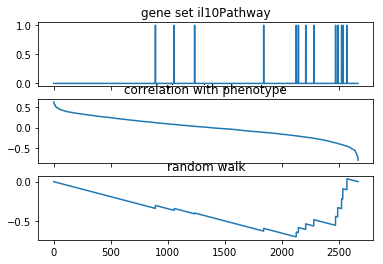

In [127]:
name = 'il10Pathway'
L,r = rank_genes(D,C)
plot_es_calculations(name, L, r)

In [128]:
n = 1000
S =  gene_set_hash[name]['indexes']
L, r = rank_genes(D,C)
ES = enrichment_score(L,r,S)
ES_pi = np.zeros(n)
for i in range(n):
    pi = np.array([np.random.randint(0,2) for i in range(k)])
    L, r = rank_genes(D,pi)
    ES_pi[i] = enrichment_score(L,r,S)

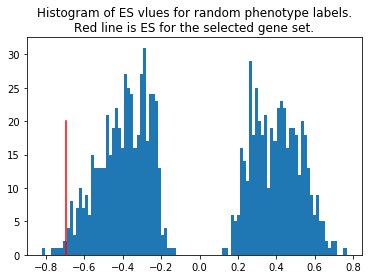

In [133]:
hist(ES_pi,bins=100)
plot([ES,ES],[0,20],'r-',label="ES(S)")
title("Histogram of ES vlues for random phenotype labels.\nRed line is ES for the selected gene set.")


ES = 0.310030395773


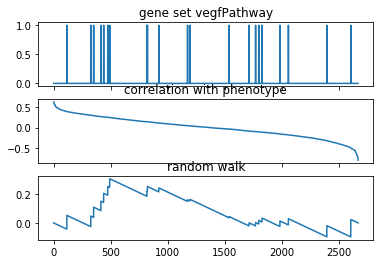

In [17]:
name = 'vegfPathway'
L,r = rank_genes(D,C)
plot_es_calculations(name, L, r)

In [20]:
n = 1000
S =  gene_set_hash[name]['indexes']
L, r = rank_genes(D,C)
ES = enrichment_score(L,r,S)
ES_pi = np.zeros(n)
for i in range(n):
    pi = np.array([np.random.randint(0,2) for i in range(k)])
    L, r = rank_genes(D,pi)
    ES_pi[i] = enrichment_score(L,r,S)

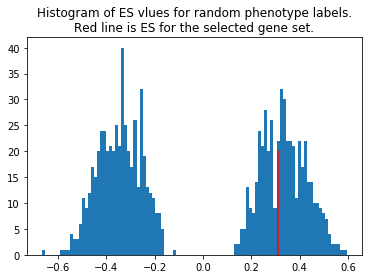

In [21]:
hist(ES_pi,bins=100)
plot([ES,ES],[0,20],'r-',label="ES(S)")
title("Histogram of ES vlues for random phenotype labels.\nRed line is ES for the selected gene set.")
